<a href="https://colab.research.google.com/github/gstvmt/lia1-2023-1/blob/main/Entregas%20-%20GustavoMotaBarros/Entrega%20-%20Deploying_a_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Criando modelo Dogs vs Cats

In [ ]:
!pip install -Uqq fastai
!pip install duckduckgo_search

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from duckduckgo_search import ddg_images
from fastcore.all import *
from fastai.vision.all import *

In [ ]:
def search_images_ddg(palavra, maximo_imagens=150):
    return L(ddg_images(palavra, max_results=maximo_imagens)).itemgot('image')

In [ ]:
itens = {'dog','cat'}
path = Path("dog_or_cat")

if not path.exists():
    path.mkdir()
    for i in itens:
        dest = path/i
        dest.mkdir(exist_ok=True)
        results = search_images_ddg(f"{i} photo")
        download_images(dest, urls=results)

fns = get_image_files(path)
fns

/usr/local/lib/python3.10/dist-packages/duckduckgo_search/compat.py:60: UserWarning: ddg_images is deprecated. Use DDGS().images() generator
  warnings.warn("ddg_images is deprecated. Use DDGS().images() generator")
/usr/local/lib/python3.10/dist-packages/duckduckgo_search/compat.py:64: UserWarning: parameter page is deprecated
  warnings.warn("parameter page is deprecated")
/usr/local/lib/python3.10/dist-packages/duckduckgo_search/compat.py:66: UserWarning: parameter max_results is deprecated
  warnings.warn("parameter max_results is deprecated")


(#177) [Path('dog_or_cat/dog/2b093b0e-7513-4029-bffd-3c4035735d6a.jpg'),Path('dog_or_cat/dog/383faf93-0328-483f-a09f-5579c4619715.jpg'),Path('dog_or_cat/dog/2991374f-e2ea-4e22-afd7-94fcb1767901.jpg'),Path('dog_or_cat/dog/750c8387-7068-4a6c-8364-f7b6aefc7d55.jpg'),Path('dog_or_cat/dog/362e5cde-46d6-44ce-97aa-e5c04911ea01.jpg'),Path('dog_or_cat/dog/d675838e-81b4-4bc2-9433-66fdf223bbd0.jpg'),Path('dog_or_cat/dog/b5054f3d-c7c2-419f-a4d3-941da476c2e6.jpg'),Path('dog_or_cat/dog/352cd917-0727-4b10-8a53-b9c37221eb91.jpeg'),Path('dog_or_cat/dog/dea041f3-fa1e-4dab-8607-e335f7e1dd2b.jpg'),Path('dog_or_cat/dog/e56ad18b-0af8-439f-8810-61020ae7dbcd.jpg')...]

In [ ]:
failed = verify_images(fns)
failed.map(Path.unlink)

(#3) [None,None,None]

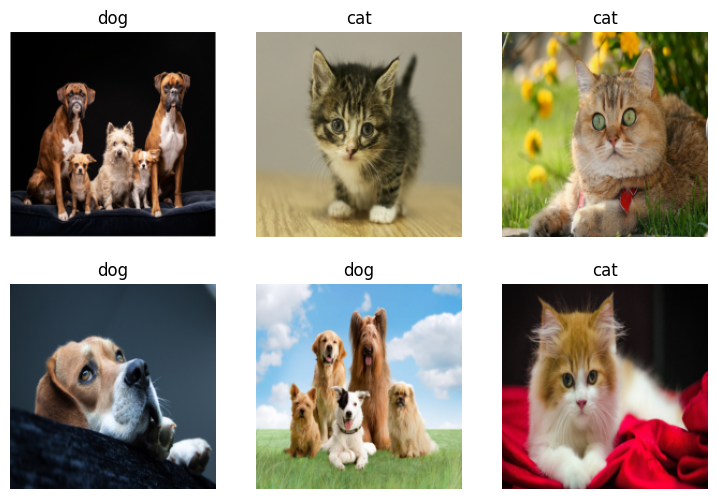

In [ ]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(192, method='squish')
).dataloaders(path, bs=32)

dls.show_batch(max_n=6)

In [ ]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 199MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,0.697041,0.209993,0.088235,00:42


epoch,train_loss,valid_loss,error_rate,time
0,0.100180,0.106101,0.058824,00:47
1,0.090234,0.090843,0.058824,00:47
2,0.061451,0.071781,0.029412,00:47
3,0.045374,0.075806,0.058824,00:47


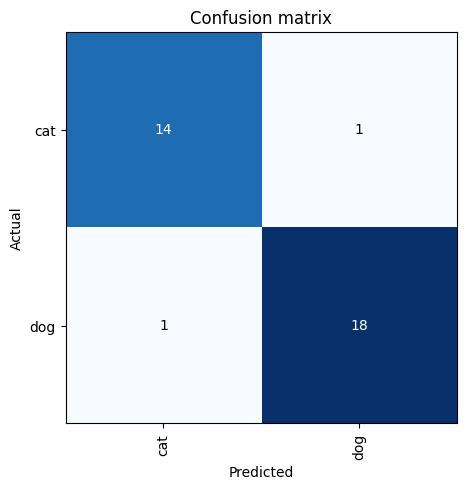

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()
learn.export('model.pkl')

# Fazendo o deploy

In [ ]:
!pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.9/19.9 MB 69.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 54.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 6.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.1/288.1 kB 23.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 24.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 136.6/136.6 kB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 

In [ ]:
import gradio as gr

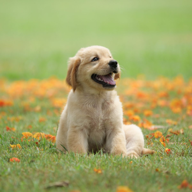

In [ ]:
im = PILImage.create('dog.jpg')
im.thumbnail((192,192))
im

In [ ]:
learner = load_learner('model.pkl')
learner.predict(im)

('dog', tensor(1), tensor([1.9614e-05, 9.9998e-01]))

In [ ]:
categories = ('Cat', 'Dog')

def classify_image(img):
  pred,idx,prob = learner.predict(img)
  return dict(zip(categories, map(float, prob)))

In [ ]:
classify_image(im)

{'Cat': 1.9614104530774057e-05, 'Dog': 0.9999803304672241}

In [ ]:
image = gr.inputs.Image(shape=(192,192))
label = gr.outputs.Label()
examples = ['dog.jpg', 'cat.jpg']

intf = gr.Interface(fn=classify_image, inputs=image, outputs=label, examples=examples)
intf.launch(inline=False, share=True)

/usr/local/lib/python3.10/dist-packages/gradio/inputs.py:259: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/gradio/inputs.py:262: UserWarning: `optional` parameter is deprecated, and it has no effect
  super().__init__(
/usr/local/lib/python3.10/dist-packages/gradio/outputs.py:197: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/gradio/outputs.py:200: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  super().__init__(num_top_classes=num_top_classes, type=type, label=label)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://beac7daa6938a4d87c.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces


# Deploy feito no huggingface
--> https://huggingface.co/spaces/GustavoMota/FirstDeploy